## PROJECT :

In [1]:
# import all libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("Flight Data.xlsx")

In [4]:
# First five row
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Last five row
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
df.shape

(10683, 11)

<h2 Style="color:red" >  Exploratory Data Analysis (EDA) :</h2>

In [7]:
# Now here we will be looking at the kind of columns our dataset has.
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

- **Here we can get more information about our dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- In this dataset there are 10683 rows and 11 column.
- Most of the column has object in data type, which is an arbitary datatype.
- some columns has numeric datatype i.e int or float

- **To know more about the dataset**

In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Checking For the NAN values 

- **Now with the help of isnull() function we will see the number of null values in our dataset**

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- Only 2 null value are present in our dataset.

- **Dropping the Null values**
- we will drop these 2 value with the help of dropna() function.

In [11]:
df.dropna(inplace = True)

<AxesSubplot:>

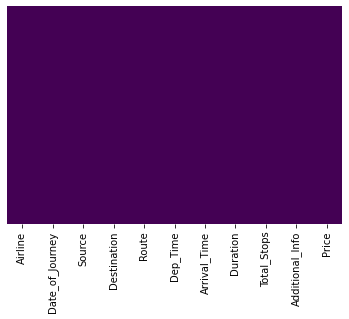

In [12]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
# Checking for Duplicate values
df.duplicated().sum()

220

- 220 duplicated values are present in our dataset
- Here we will be removing those repeated values from the dataset and keeping the in-place attribute to be true so that there will be no changes.

In [15]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
df.shape

(10462, 11)

### Checking the different Airlines 

In [17]:
df["Airline"].nunique()

12

In [18]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [19]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Checking the different Airline Routes

In [20]:
df["Route"].nunique()

128

In [21]:
df["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### Checking the Additional_info column and having the count of unique types of values.

In [22]:
df["Additional_Info"].nunique()

10

In [23]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<AxesSubplot:>

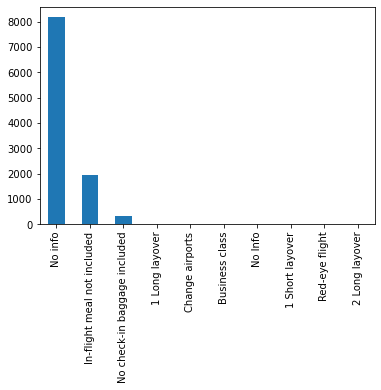

In [25]:
df['Additional_Info'].value_counts().plot(kind = 'bar')

### Checking the Total_Stops

In [26]:
df["Total_Stops"].nunique()

5

In [27]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [28]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

<h2 Style="color:Brown" > Data Visualization :</h2>

### Checking For Outliers 

<AxesSubplot:ylabel='Density'>

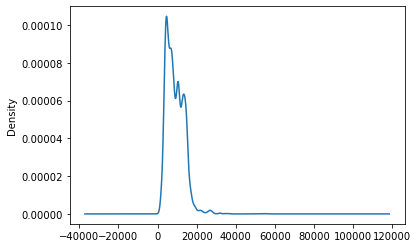

In [29]:
df['Price'].plot(kind = 'kde')

<AxesSubplot:xlabel='Price'>

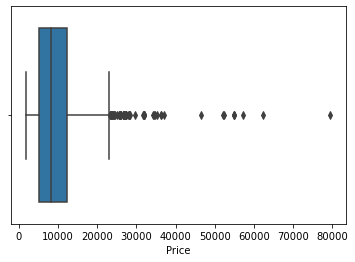

In [30]:
sns.boxplot(x = 'Price' , data = df)

**Plotting Box plot for Price vs Source**

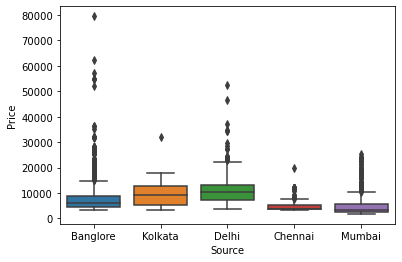

In [31]:
sns.boxplot(x = 'Source', y = 'Price', data = df)
plt.show()

- Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least

**Plotting Box plot for Price vs Destination**

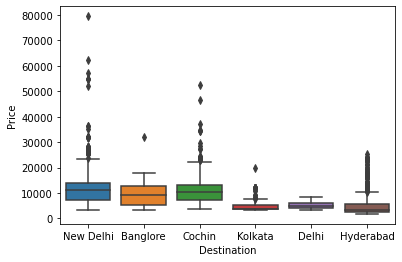

In [32]:
sns.boxplot(x = 'Destination', y = 'Price', data = df)
plt.show()

- Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.

**Plotting Price vs Airline plot**

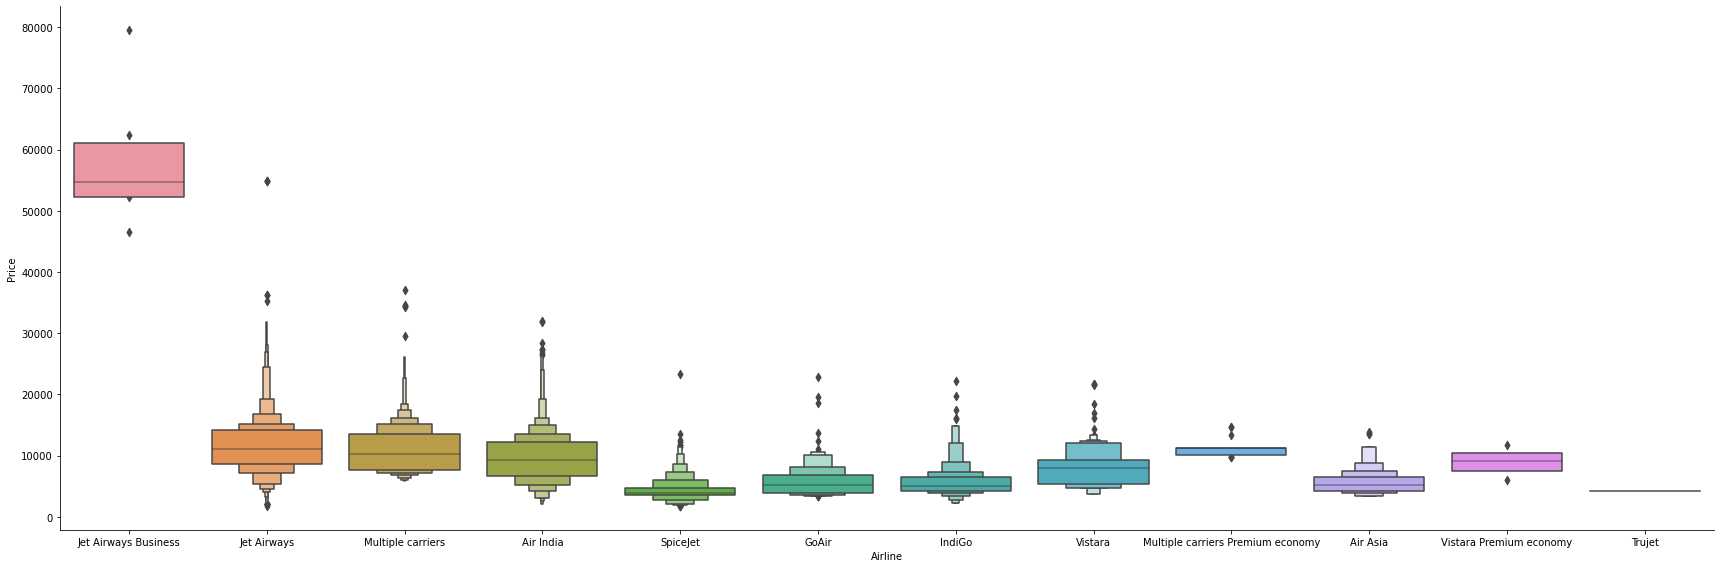

In [33]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

- Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

**Plotting Bar chart for Types of Airline vs Number of Flights**

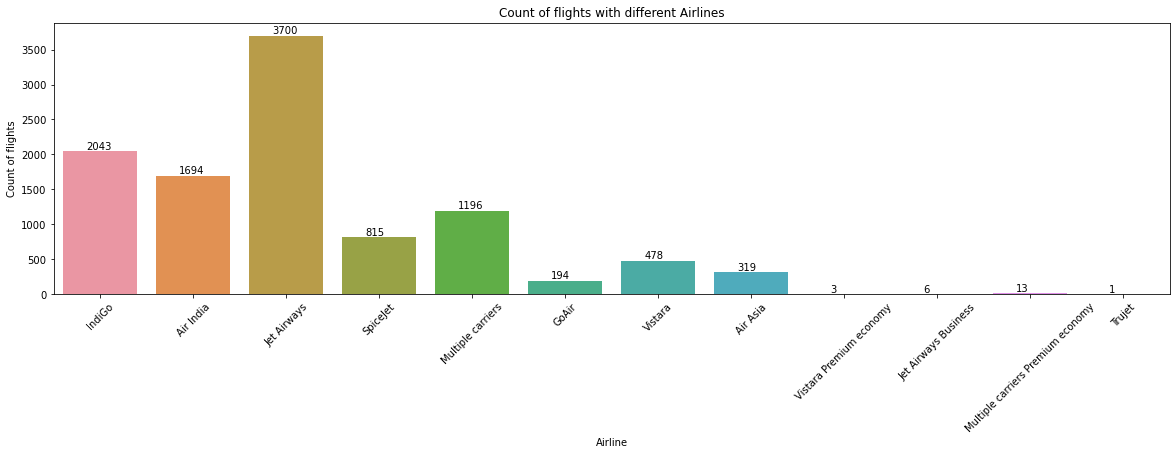

In [34]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

-  Now from the above graph we can see that between the type of airline and count of flights we can see that Jet Airways has the most flight boarded.

### Checking For Source column

In [35]:
df["Source"].nunique()

5

In [36]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [37]:
df["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

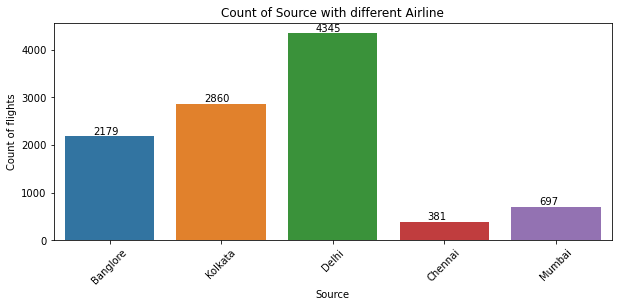

In [38]:
plt.figure(figsize = (10,4))
plt.title('Count of Source with different Airline')
ax=sns.countplot(x = 'Source', data =df)
plt.xlabel('Source')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

### Checking For Destination column 

In [39]:
df["Destination"].nunique()

6

In [40]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [41]:
df["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

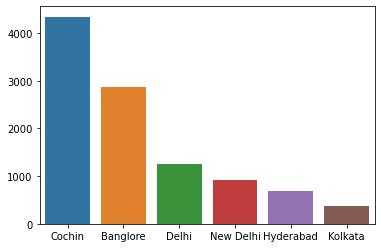

In [42]:
sns.barplot(df["Destination"].value_counts().index,df["Destination"].value_counts().values)

### Feature Engineering 

In [43]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [44]:
def fun(X):
    a=0
    df=X.split(" ")
    for i in df:
        if i[-1]=="h":
            a +=int(i[:-1])*60
        elif i[-1]=="m":
            a+=int(i[:-1])
            
    return a

In [45]:
df["Duration"]=df["Duration"].apply(fun)

In [46]:
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [47]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [48]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [49]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


### Plotting Bar chart for Months (Duration) vs Number of Flights

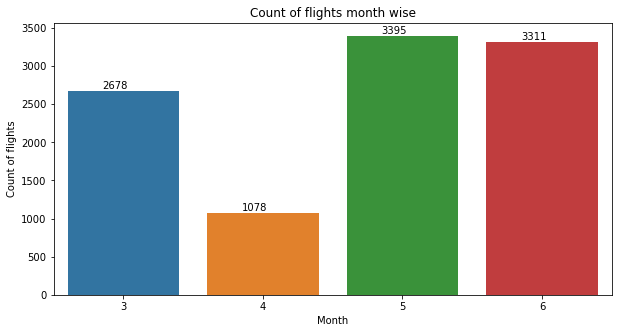

In [50]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color='black') 

- Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that May has the most number of flights.

### Plotting Ticket Prices VS Airlines 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

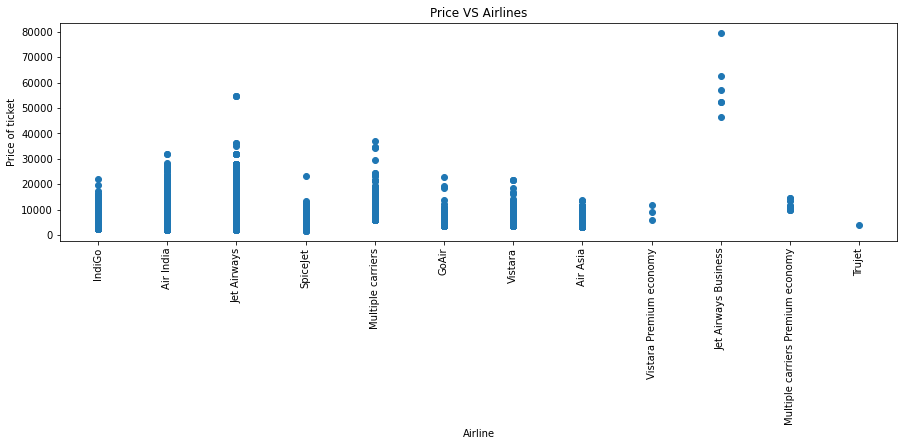

In [51]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

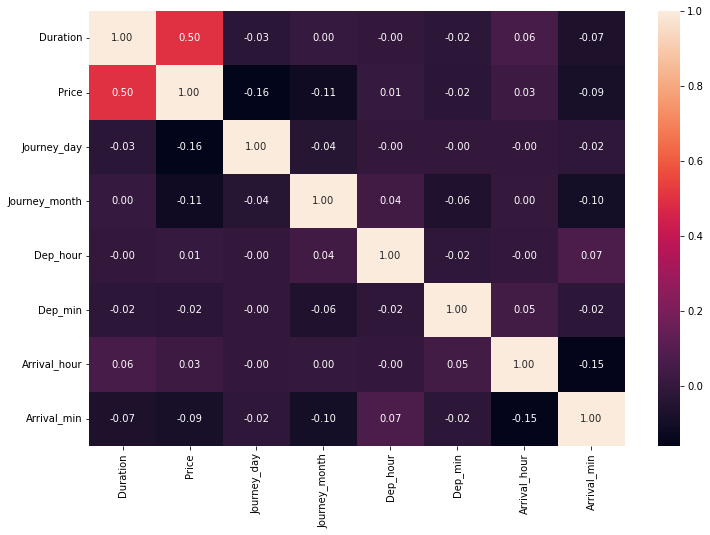

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

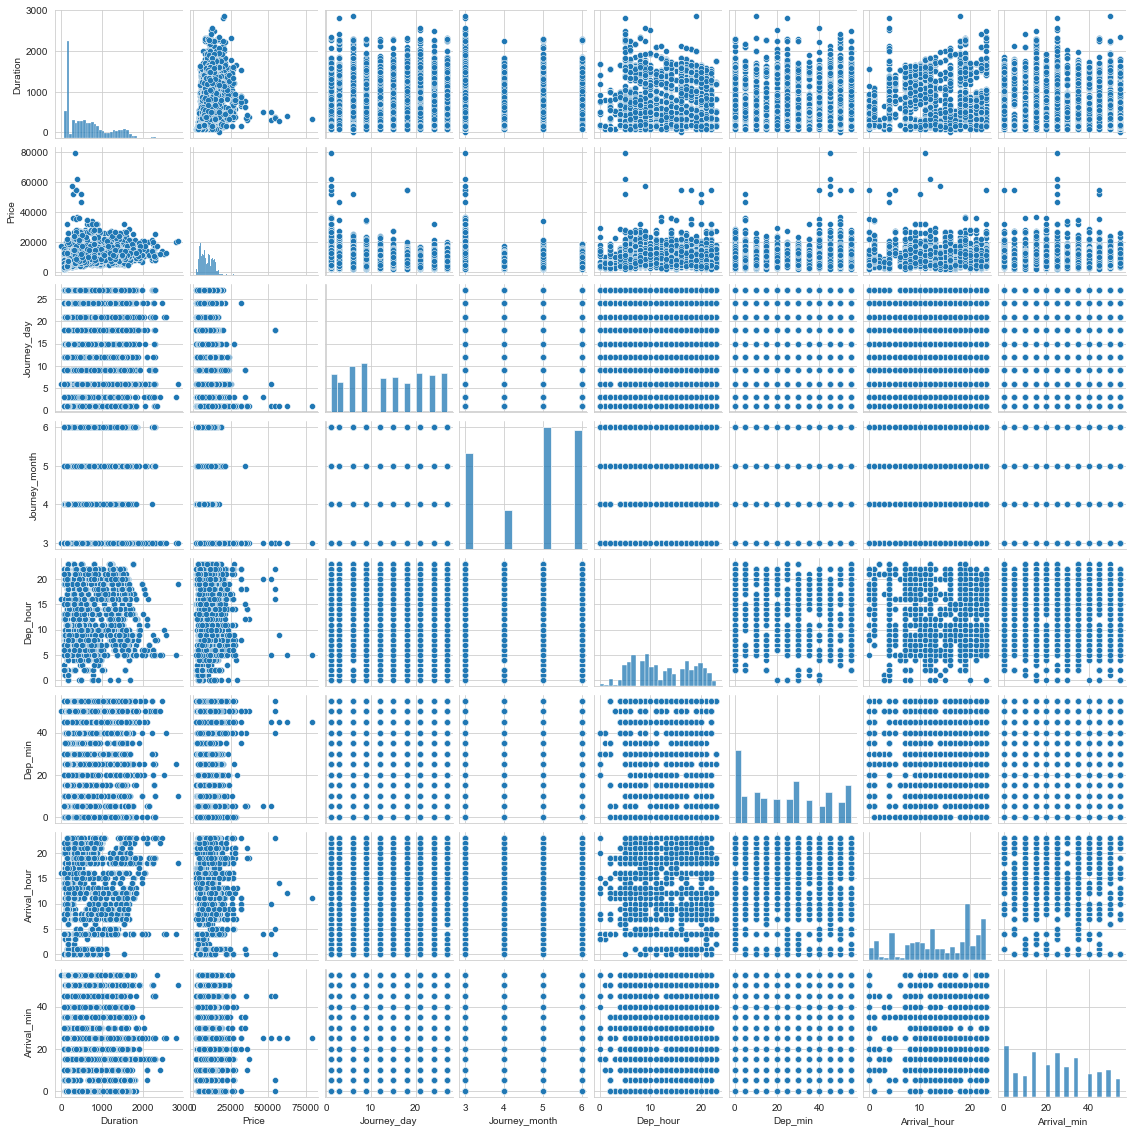

In [53]:
#pairplot
sns.set_style("whitegrid");
sns.pairplot(df,height=2);
plt.show()

 ### Handling Categorical Data 

In [54]:
data = df.drop(["Price"], axis=1)

In [55]:
categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

In [56]:
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [57]:
numerical_data.head()

,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,24,3,22,20,1,10
1,445,1,5,5,50,13,15
2,1140,9,6,9,25,4,25
3,325,12,5,18,5,23,30
4,285,1,3,16,50,21,35


## One Hot Encoding :

In [58]:
Airline=pd.get_dummies(categorical_data["Airline"],drop_first=True)

In [59]:
Destination=pd.get_dummies(categorical_data["Destination"],drop_first=True)

In [60]:
Total_Stops=pd.get_dummies(categorical_data["Total_Stops"],drop_first=True)

In [61]:
categorical_data[Airline.columns]=Airline
categorical_data[Destination.columns]=Destination
categorical_data[Total_Stops.columns]=Total_Stops

In [62]:
categorical_data.drop(columns=["Airline","Destination","Source","Total_Stops","Route","Additional_Info"],inplace=True)

In [63]:
categorical_data

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,2 stops,3 stops,4 stops,non-stop
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10680,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


- **Now our dataset is ready to applying the machine learning Algoritm**

<h2 style="color:orange" > Model Building :</h2> 

- Linear Regression is a useful tool for predicting a quantitative response.
- **Prediction using:** 

             1. Linear Regression

- Extracting dependent and independent Variables:

In [64]:
x=pd.concat([categorical_data, numerical_data], axis=1)
y=df['Price']

In [65]:
x

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,3 stops,4 stops,non-stop,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,170,24,3,22,20,1,10
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,445,1,5,5,50,13,15
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1140,9,6,9,25,4,25
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,325,12,5,18,5,23,30
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,285,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,1,150,9,4,19,55,22,25
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,1,155,27,4,20,45,23,20
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,1,180,27,4,8,20,11,20
10681,0,0,0,0,0,0,0,0,0,1,...,0,0,1,160,1,3,11,30,14,10


In [66]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [67]:
#from sklearn.preprocessing import StandardScaler

In [68]:
#sc=StandardScaler()

In [69]:
#xtest=sc.fit_transform(x)


**Now we will split the dataset into training and test Dataset.**

In [70]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=40)

- **Import and Fitting the machine learning model to the training dataset.**

In [71]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(xtrain, ytrain)

LinearRegression()

- **Now, we have successfully trained our model using the training dataset. we will test the performance of the model using the test dataset.**

In [72]:
ytest_pred = model_linreg.predict(xtest)

In [73]:
# printing the model intercept and coefficient
model_linreg.intercept_
model_linreg.coef_
print('Intercept: ', model_linreg.intercept_)
print('Coefficient:',model_linreg.coef_)

Intercept:  10213.267687513218
Coefficient: [ 1.74304721e+03 -8.72216365e+01  2.83219606e+02  4.36740082e+03
  4.64163102e+04  3.65321936e+03  3.49902306e+03 -1.29568824e+02
  2.22371455e-10  2.14269539e+03  3.03859910e+03  1.15077263e+02
 -4.36406445e+02 -1.33671348e+03  4.35898449e+02  1.83160510e+03
  2.48661614e+03  3.65023660e+03  5.36399516e+03 -3.43150001e+03
 -6.88020199e-02 -7.64113843e+01 -4.01695989e+02  2.12125078e+01
 -1.53635070e+00 -1.48405627e+01  3.56824799e+00]


In [74]:
#Actual values and predicted values
val_diff = pd.DataFrame({'Actual value': ytest, 'Predicted value': ytest_pred})
val_diff

,Actual value,Predicted value
9930,21934,14444.149925
6114,15129,13520.748742
8019,12677,10370.235000
2287,14231,11533.857278
4000,4823,3979.690065
...,...,...
4291,4823,4965.417471
7526,10844,11287.692192
129,3597,4845.234370
5373,9586,14280.269319


## Evaluation Metrics :
- print the R2, MSE and RMSE values for the mode.

- **FOR MSE :**

In [75]:
from sklearn.metrics import *
mse=mean_squared_error(ytest,ytest_pred)
print('MSE :',mse)

MSE : 7215897.360609415


- **FOR RMSE :**

In [76]:
rmse={np.sqrt(mean_squared_error(ytest, ytest_pred))}
print('rmse :',rmse)

rmse : {2686.242237887234}


- **FOR R2 :**

In [77]:
r2=r2_score(ytest,ytest_pred)
print('r2_Score :',r2)

r2_Score : 0.6470520252221659


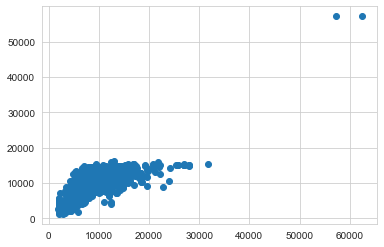

In [78]:
plt.scatter(ytest, ytest_pred)

**Using Lasso Regression Model(L1 Regularization) :**

In [79]:
from sklearn.linear_model import Lasso
model_lasso_reg =Lasso(alpha=50, max_iter=50, tol=0.1)
model_lasso_reg.fit(xtrain, ytrain)

Lasso(alpha=50, max_iter=50, tol=0.1)

In [80]:
print("Lasso_Regression_test_score :",model_lasso_reg.score(xtest, ytest))

Lasso_Regression_test_score : 0.5260161200739983


**Using Ridge Regression Model (L2 Regularization)**

In [81]:
from sklearn.linear_model import Ridge
model_ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.2)
model_ridge_reg.fit(xtrain, ytrain)

Ridge(alpha=50, max_iter=100, tol=0.2)

In [82]:
print("Ridge_regression_test_score :",model_ridge_reg.score(xtest,ytest))

Ridge_regression_test_score : 0.5524515440384586


<h2 style="color:green" > 2.Support Vector Machine :</h2> 

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [84]:
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(xtrain, ytrain)

SVR()

In [85]:
ytest_pred = model_svm.predict(xtest)

In [86]:
from sklearn.metrics import *
print(f"mse : {mean_squared_error(ytest, ytest_pred)}",'\n')

print(f"emse : {np.sqrt(mean_squared_error(ytest, ytest_pred))}",'\n')

print(f"r2_Score : {r2_score(ytest, ytest_pred)}")

mse : 17795839.03813118 

emse : 4218.511471850134 

r2_Score : 0.14313686534275694


<h2 style="color:red" > 3.Random Forest Regressor :</h2>

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [88]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=350,random_state=2,max_features=0.75,max_depth=15)
model_rf.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=15, max_features=0.75, n_estimators=350,
                      random_state=2)

In [89]:
ytest_pred = model_rf.predict(xtest)

In [90]:
from sklearn.metrics import *
print(f"mse : {mean_squared_error(ytest, ytest_pred)}",'\n')

print(f"rmse : {np.sqrt(mean_squared_error(ytest, ytest_pred))}",'\n')

print(f"r2_Score : {r2_score(ytest, ytest_pred)}")

mse : 3401177.929606481 

rmse : 1844.228274809407 

r2_Score : 0.8362345278553559


<h2 style="color:blue" > 3.Decision Tree Regressor :</h2>

In [91]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeRegressor  
model_DT_Regressor= DecisionTreeRegressor()  
model_DT_Regressor.fit(xtrain, ytrain)  

DecisionTreeRegressor()

In [92]:
#Predicting the test set result
ytest_pred= model_DT_Regressor.predict(xtest)

In [93]:
from sklearn.metrics import *
print(f"mse : {mean_squared_error(ytest, ytest_pred)}",'\n')

print(f"rmse : {np.sqrt(mean_squared_error(ytest, ytest_pred))}",'\n')

print(f"r2_score : {r2_score(ytest, ytest_pred)}")

mse : 6360136.595370517 

rmse : 2521.931124232087 

r2_score : 0.6937617513689464


<h2 style="color:red" > 4.Grid Search CV :</h2>

In [94]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[490,500,510,520],
        "min_samples_split":[9,10,11],
        "max_depth":[120,130,150,160,170]
    
}

model=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,n_jobs=-1,cv=3,verbose=2)


In [95]:
model.fit(xtrain,ytrain)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [120, 130, 150, 160, 170],
                         'min_samples_split': [9, 10, 11],
                         'n_estimators': [490, 500, 510, 520]},
             verbose=2)

In [96]:
model.best_score_

0.7929112138121243

In [97]:
model.best_estimator_

RandomForestRegressor(max_depth=120, min_samples_split=9, n_estimators=510)

In [98]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x)for x in np.linspace(100,2000,10)]
max_depth = [int(x) for x in np.linspace(100,2000,10)]
min_samples_splits = [2,4,6,8,10,12,14]
min_samples_splits =[1,3,5,7,8,10]
max_features = ['sqrt','log2','auto','none']

random_search ={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_splits':min_samples_splits,
    'min_samples_splits':min_samples_splits,
    'max_features':max_features,
    
}
random_search
    

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_splits': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', 'none']}

In [99]:
model_list = [LinearRegression() , Ridge() , Lasso() , SVR() , RandomForestRegressor() , DecisionTreeRegressor() ]
model_list1 = []
r2_Score = []
mse = [] 
rmse = []


for model in model_list:
    model_list1.append(str(model))
    model.fit(xtrain , ytrain)
    ytest_pred = model.predict(xtest) 
    r2_Score.append(round(r2_score(ytest , ytest_pred) , 2))
    mse.append(round(mean_absolute_error(ytest , ytest_pred) , 2))
    rmse.append(round(mean_absolute_percentage_error(ytest , ytest_pred) , 2))
    

In [100]:
dict = {'Model':model_list1, 'R2_score':r2_Score , 'MSE':mse ,   'RMSE':rmse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')
model_df

,Model,R2_score,MSE,RMSE
4,RandomForestRegressor(),0.81,1200.34,0.14
5,DecisionTreeRegressor(),0.70,1400.22,0.16
0,LinearRegression(),0.61,1985.92,0.25
1,Ridge(),0.61,1991.51,0.25
2,Lasso(),0.61,1987.64,0.25
3,SVR(),0.14,3082.67,0.40


- **After Applying all these algorithms Random Forest regressor Give us best Accuracy.**